# Load the data and explore it

Load Data

In [450]:
# Load the dataset

import pandas as pd
from pandas import plotting as pdplt

import numpy as np
from numpy import random

import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


csvf = './brainsize.csv'

data = pd.read_csv(csvf, sep=';', index_col=0, na_values=".")
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545




Check general stadistics of our data.

In [451]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Let's check what data types we have 

In [452]:
data.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

Data typese seems to make sense so we will not asert any of them for now 

We don't want to have NaN values in our data, before continuing, we will delete all of them.

In [453]:
dataf = data.dropna()
print('We lost a total of ', data.shape[0] - dataf.shape[0], 'subjects')

We lost a total of  2 subjects


We did not lose may subjects, so we will igonre any nan.

In [454]:
data = dataf

# Create our first very important variable base on very fine observations

One of our most interesting data we did not include in the previous csv was the Time to Get from the Door to the Chair (TGDC)  and also very intersting Time to Get from the Chair to the Door (TGCD).

Both are measured in seconds and are rounded to full seconds

These where calculated using the hacked security system of our lab. 

In [455]:
# Generate my for sure very interesting and correlated extra variable

# our_seed = 19999999
# random.seed(our_seed)

# mu, sigma = 150., 40. # mean and standard deviation
# partY = np.random.normal(mu, sigma, size=data.shape[0])
# partY = [round(num) for num in partY]

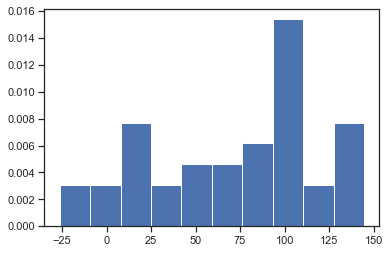

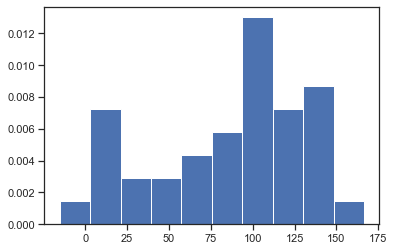

In [456]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 50, "scale": 40}},
    {"type": np.random.normal, "kwargs": {"loc": 120, "scale": 30}},
]
coefficients = np.array([0.6, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = data.shape[0]

our_seed = 1000000000
np.random.seed(our_seed)
num_distr = len(distributions)
rdata = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    rdata[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])
random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
partY = rdata[np.arange(sample_size), random_idx]

our_seed = 9000000
np.random.seed(our_seed)
random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
partY2 = rdata[np.arange(sample_size), random_idx]

plt.hist(partY, density=True)
plt.show()

plt.hist(partY2, density=True)
plt.show()

enbedd our new super amazin varaliable in our dataframe


In [457]:
data.insert(2, "TGDC", partY, False) 
data.insert(2, "TGCD", partY2, False) 

Check that is inserted correctly

In [458]:
data.describe()

,FSIQ,TGCD,TGDC,VIQ,PIQ,Weight,Height,MRI_Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,113.552632,84.077342,72.641310,112.131579,111.342105,151.052632,68.421053,9.067542e+05
std,23.815391,46.125974,47.326414,22.939605,22.597867,23.478509,3.993790,7.256175e+04
min,77.000000,-15.379019,-26.321553,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,90.250000,52.714599,27.446763,90.250000,89.250000,135.250000,66.000000,8.548115e+05
50%,116.500000,97.082073,84.566275,113.000000,115.000000,146.500000,68.000000,9.053990e+05
75%,135.000000,117.810864,106.015576,129.000000,128.000000,172.000000,70.375000,9.495405e+05
max,144.000000,166.542955,144.675942,150.000000,150.000000,192.000000,77.000000,1.079549e+06


# Get an overview of our data 

<Figure size 864x576 with 0 Axes>

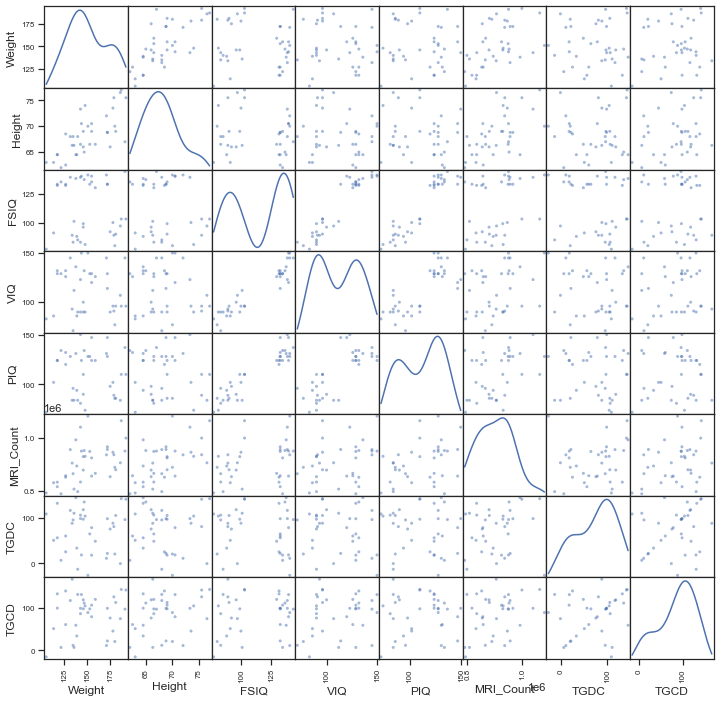

In [459]:
fig = plt.figure(figsize=(12,8))
pdplt.scatter_matrix(data[['Weight', 'Height', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count', 'TGDC', 'TGCD']], diagonal='kde', figsize=(12,12));

Looking at the distributions we see that exploring FSIQ VIQ and PIQ could be a good direction

Looking at VIQ         Slope:-0.374     P-value:-0.181      R-squared:0.0329     
Looking at FSIQ        Slope:-0.276     P-value:-0.139      R-squared:0.0193     
Looking at PIQ         Slope:-0.187     P-value:-0.0894     R-squared:0.00799    
Looking at MRI_Count   Slope:9.63e-05   P-value:0.148       R-squared:0.0218     
Looking at Height      Slope:0.0183     P-value:0.00154     R-squared:2.38e-06   


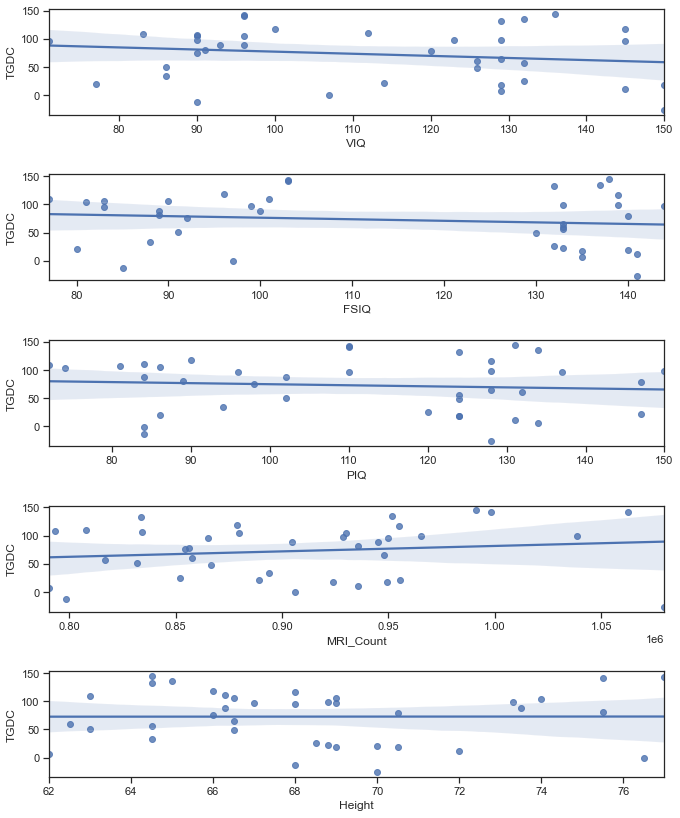

In [460]:

sns.set(style="ticks")

to_explore = ['VIQ', 'FSIQ', 'PIQ', 'MRI_Count', 'Height']

f, axes = plt.subplots(len(to_explore), 1, figsize=(10,12))
ptl_idx = 0
f.tight_layout(pad=3.0)

for varN in to_explore:
    sns.regplot(data[varN], data.TGDC, ax=axes[ptl_idx])
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[varN], data.TGDC)
    print('Looking at {:<10}  Slope:{:<10.3} P-value:{:<10.3}  R-squared:{:<10.3} '.format(varN, slope , r_value, r_value**2))
    ptl_idx += 1



It seems that if we get rid of some big outliers we will be able to have a better result.

Also we will combine PIQ and FSIQ to a new variable in the model 

In [472]:
super_model = 'TGDC ~ VIQ : FSIQ :PIQ + MRI_Count + Height + PIQ'
super_model2 = 'TGCD ~ VIQ : FSIQ :PIQ + MRI_Count + Height + PIQ'


# Fit the model
model= ols(super_model, data)

model_fit = model.fit()

# Print the summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   TGDC   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.308
Time:                        01:31:33   Log-Likelihood:                -197.30
No. Observations:                  38   AIC:                             404.6
Df Residuals:                      33   BIC:                             412.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.8383    146.757      0.353   

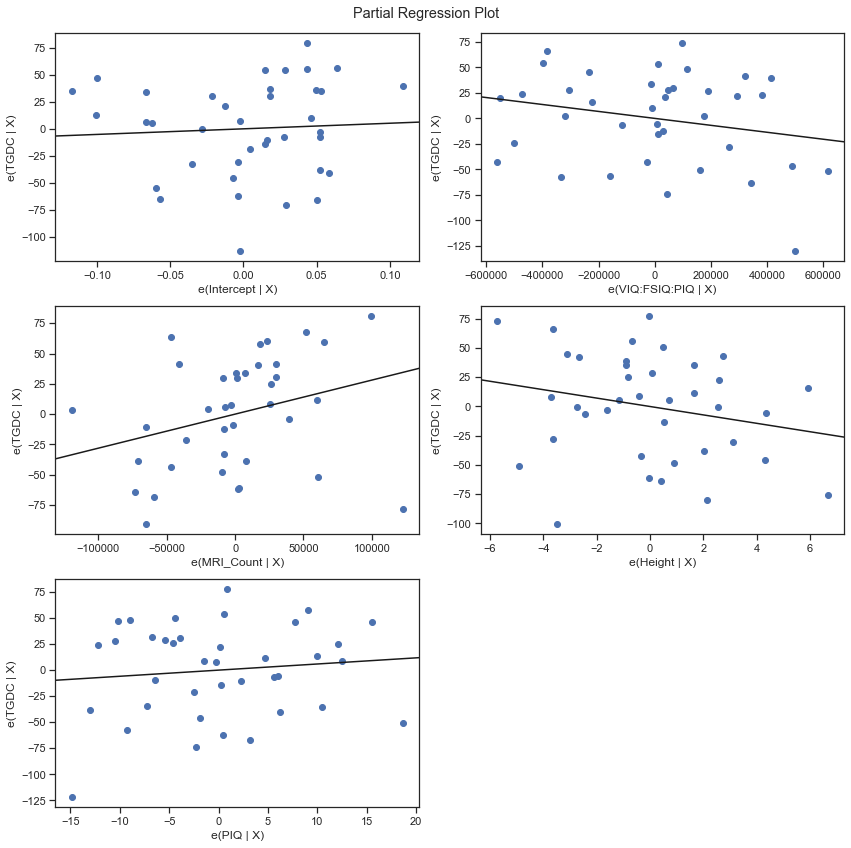

In [462]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model_fit, fig=fig)

We can see that our data have some outliers. We will control find what z score to use for our dataset

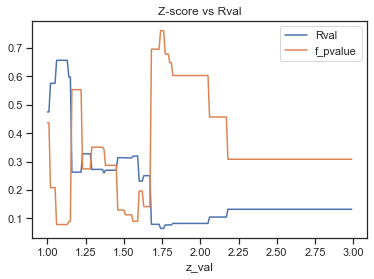

In [466]:
z_val = np.arange(1,3, 0.01)

inculded_vars = ['Height', 'FSIQ', 'PIQ', 'VIQ']

df = pd.DataFrame(columns=['z_val', 'Rval', 'f_pvalue' ])


for val in z_val:
    
    z_s = np.abs(stats.zscore(data[inculded_vars]))
    dataf = data[(z_s < val).all(axis=1)]

    if dataf.shape[0] < 1:
        df = df.append( {'z_val':val, 'Rval':0, 'f_pvalue':0}, ignore_index=True)
        continue
    
    # Fit the model
    model= ols(super_model, dataf)

    rs = model.fit()
    
    df = df.append( {'z_val':val, 'Rval':rs.rsquared, 'f_pvalue':rs.f_pvalue}, ignore_index=True)
    
df.plot(x='z_val', y=['Rval', 'f_pvalue'], title='Z-score vs Rval')



Base on the previous test we can confirm that our optimal zscore threshold is 1.56

                            OLS Regression Results                            
Dep. Variable:                   TGDC   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2.346
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0895
Time:                        01:29:46   Log-Likelihood:                -124.22
No. Observations:                  25   AIC:                             258.4
Df Residuals:                      20   BIC:                             264.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      370.1669    246.804      1.500   

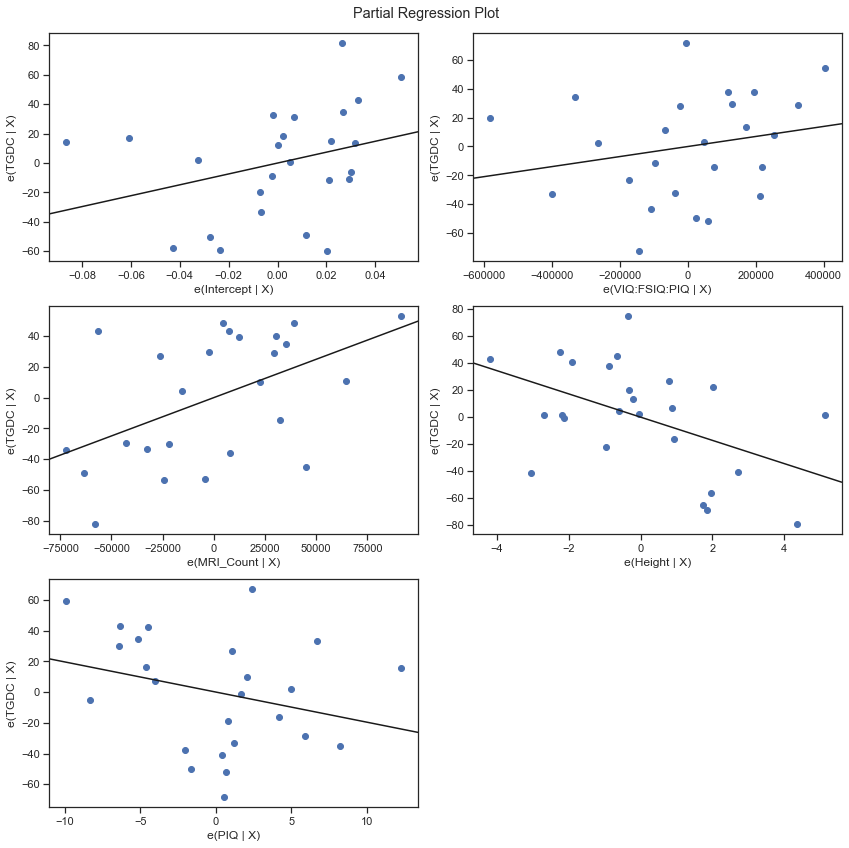

In [469]:
z_s = np.abs(stats.zscore(data[inculded_vars]))
dataf = data[(z_s < 1.56).all(axis=1)]
model= ols(super_model, dataf)

rs = model.fit()

print(rs.summary())
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(rs, fig=fig)

# Conculusion

After much study we can conclude that VIQ and FSIQ are an acurate predictor of the time the subject will need to go from the door and the chair. 

                            OLS Regression Results                            
Dep. Variable:                   TGCD   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.150
Method:                 Least Squares   F-statistic:                    0.2171
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.926
Time:                        01:31:36   Log-Likelihood:                -127.83
No. Observations:                  25   AIC:                             265.7
Df Residuals:                      20   BIC:                             271.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      283.3958    285.144      0.994   

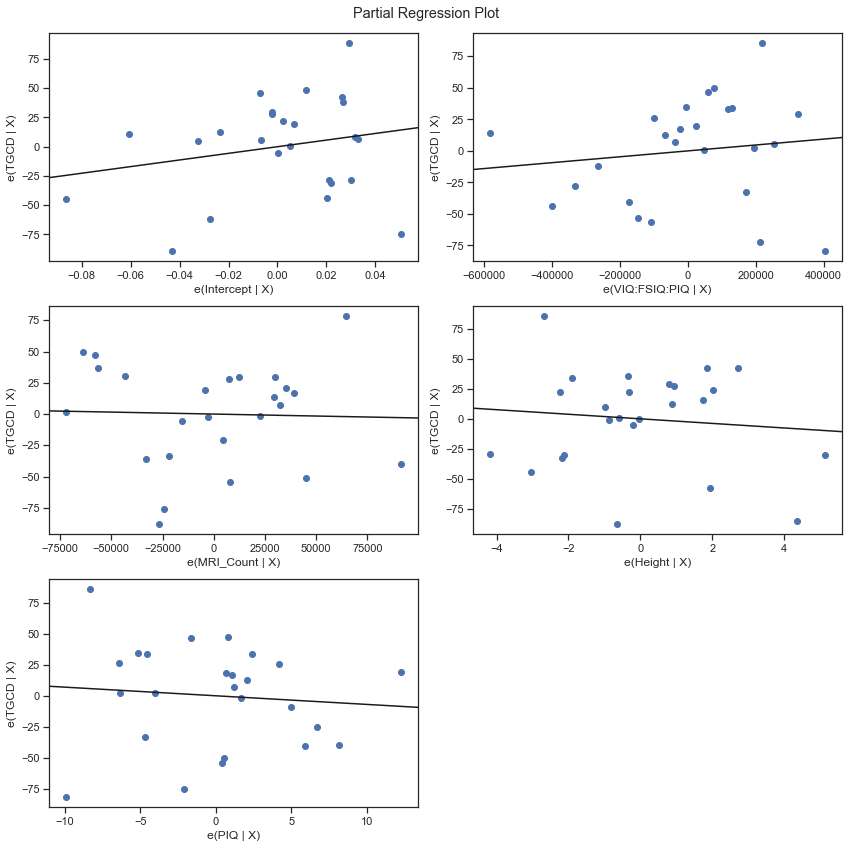

In [473]:
rdata = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    rdata[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])
random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
partY = rdata[np.arange(sample_size), random_idx]


z_s = np.abs(stats.zscore(data[inculded_vars]))
dataf = data[(z_s < 1.56).all(axis=1)]
model= ols(super_model2, dataf)

rs = model.fit()

print(rs.summary())
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(rs, fig=fig)